In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
import ast
import matplotlib.pyplot as plt

In [241]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [242]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [243]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [244]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


## Check for Duplicates

In [245]:
movies.duplicated().sum()

0

In [246]:
credits.duplicated().sum()

0

### Check for Missing Values

In [247]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [248]:
movies.drop('homepage', axis=1, inplace=True )
movies.drop('tagline', axis=1, inplace=True )

In [249]:
movies.dropna(inplace=True)

In [250]:
movies.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

# Univariate Analysis

## Release Data Analysis

In [251]:
movies['release_date'].value_counts()

2006-01-01    10
2002-01-01     8
1999-10-22     7
2014-12-25     7
2004-09-03     7
              ..
1987-11-20     1
1991-05-17     1
2006-02-12     1
2004-06-18     1
2008-01-11     1
Name: release_date, Length: 3278, dtype: int64

In [252]:
movies['release_date'].unique().tolist()

['2009-12-10',
 '2007-05-19',
 '2015-10-26',
 '2012-07-16',
 '2012-03-07',
 '2007-05-01',
 '2010-11-24',
 '2015-04-22',
 '2009-07-07',
 '2016-03-23',
 '2006-06-28',
 '2008-10-30',
 '2006-06-20',
 '2013-07-03',
 '2013-06-12',
 '2008-05-15',
 '2012-04-25',
 '2011-05-14',
 '2012-05-23',
 '2014-12-10',
 '2012-06-27',
 '2010-05-12',
 '2013-12-11',
 '2007-12-04',
 '2005-12-14',
 '1997-11-18',
 '2016-04-27',
 '2012-04-11',
 '2015-06-09',
 '2012-10-25',
 '2004-06-25',
 '2013-04-18',
 '2010-03-03',
 '2006-05-24',
 '2013-06-20',
 '2009-06-19',
 '2014-06-25',
 '2013-03-07',
 '2014-04-16',
 '2010-12-10',
 '2011-06-11',
 '2011-06-16',
 '2010-06-16',
 '2009-05-20',
 '2015-04-01',
 '2014-05-15',
 '2013-05-05',
 '2013-02-27',
 '2013-05-10',
 '2010-05-19',
 '2013-07-11',
 '2011-06-28',
 '2008-05-21',
 '2015-11-14',
 '2012-06-21',
 '2016-07-07',
 '2008-06-22',
 '2007-08-08',
 '2009-10-10',
 '2009-11-04',
 '2015-02-04',
 '2016-06-29',
 '2005-12-07',
 '2016-05-18',
 '2008-07-16',
 '2009-05-13',
 '2009-03-

## ID Analysis

In [253]:
movies['id'].value_counts()

76996     1
27983     1
7501      1
94072     1
16653     1
         ..
260778    1
681       1
299687    1
72358     1
9600      1
Name: id, Length: 4799, dtype: int64

In [254]:
movies['id'].duplicated().sum()

0

## Budget Analysis

In [255]:
movies['budget'].describe()

count    4.799000e+03
mean     2.906593e+07
std      4.073251e+07
min      0.000000e+00
25%      8.000000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

<AxesSubplot:xlabel='budget'>

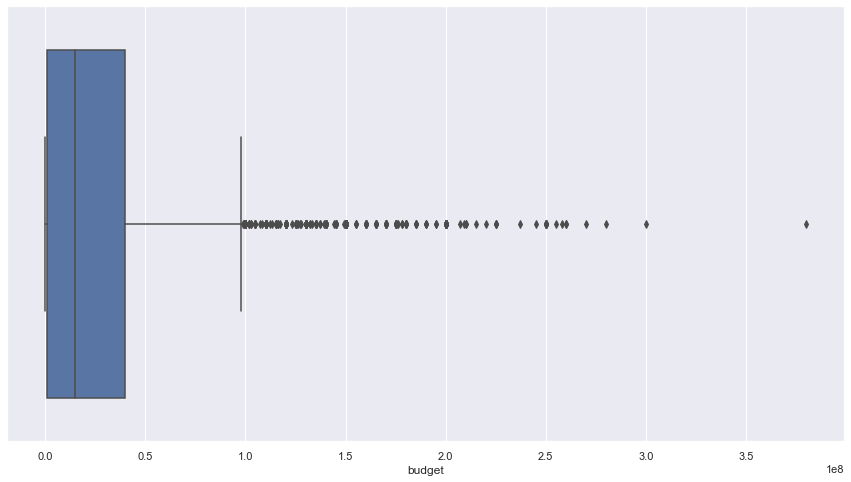

In [256]:
sns.boxplot(data = movies ,x ='budget')

In [257]:
movies.drop(movies[movies['budget'] <= 10].index,axis = 0,inplace= True)

<AxesSubplot:xlabel='budget'>

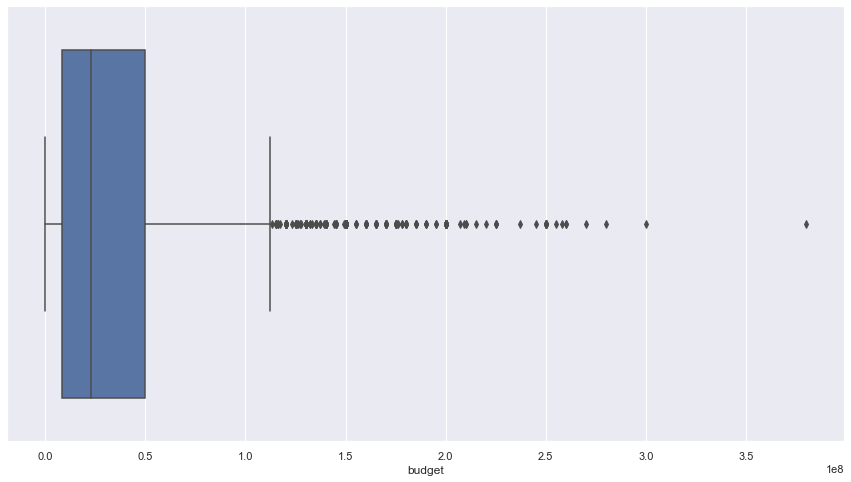

In [258]:
sns.boxplot(data = movies ,x ='budget')

## Runtime Analysis

In [259]:
movies['runtime'].describe()

count    3747.000000
mean      109.403256
std        20.762466
min         0.000000
25%        95.000000
50%       106.000000
75%       120.000000
max       338.000000
Name: runtime, dtype: float64

<AxesSubplot:xlabel='runtime', ylabel='Density'>

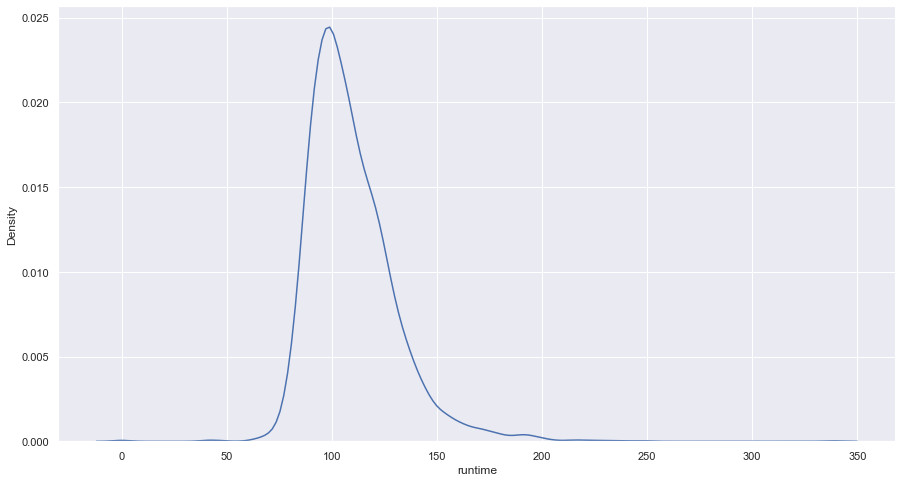

In [260]:
sns.kdeplot(data = movies ,x ='runtime')

In [261]:
movies.drop(movies[movies['runtime'] <= 10].index,axis = 0,inplace= True)

<AxesSubplot:xlabel='runtime', ylabel='Density'>

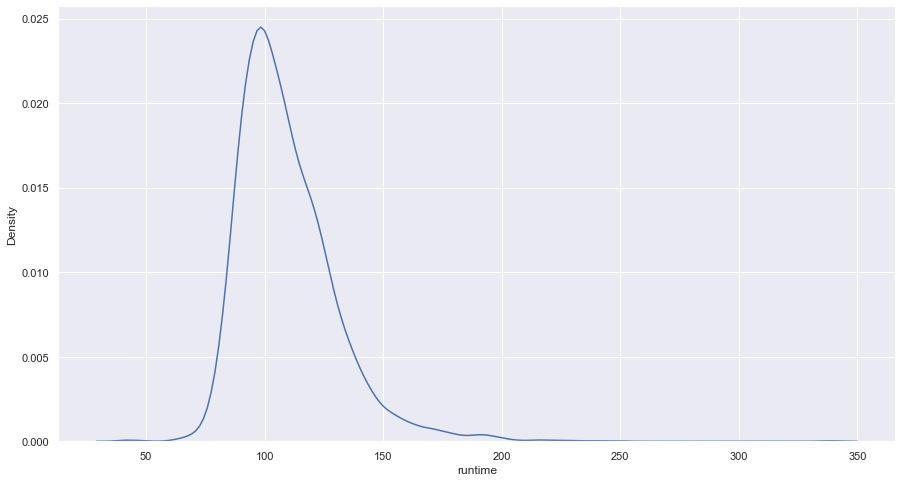

In [262]:
sns.kdeplot(data = movies ,x ='runtime')

## Revenue Analysis

In [263]:
movies['revenue'].describe()

count    3.745000e+03
mean     1.045327e+08
std      1.779690e+08
min      0.000000e+00
25%      6.491240e+06
50%      3.930000e+07
75%      1.224898e+08
max      2.787965e+09
Name: revenue, dtype: float64

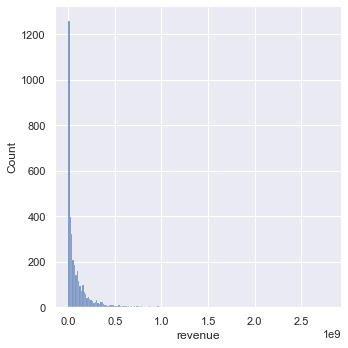

In [264]:
sns.displot(data = movies ,x ='revenue') #Outliers make sense for the business so we will keep them

## Popularity Analysis

In [265]:
movies['popularity'].describe()

count    3745.000000
mean       26.109744
std        34.490573
min         0.001586
25%         8.098369
50%        17.672021
75%        34.035114
max       875.581305
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity'>

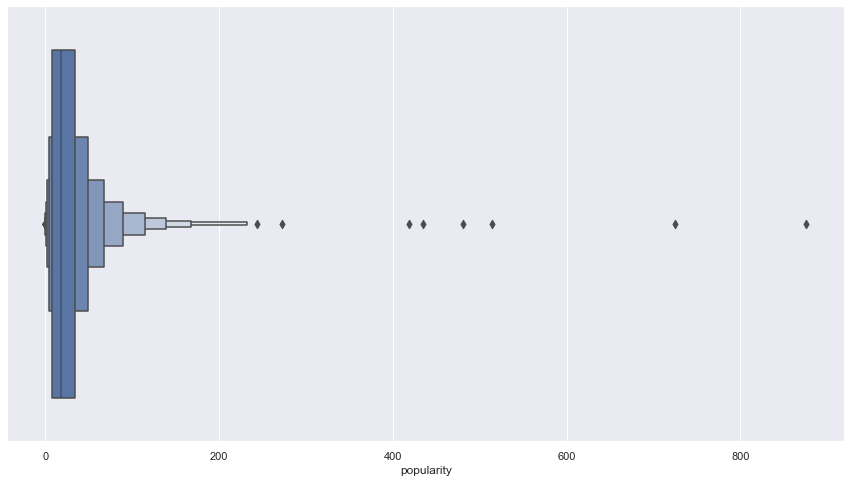

In [266]:
sns.boxenplot(data = movies ,x ='popularity') #Outliers make sense for the business so we will keep them

## Vote Average Analysis

In [267]:
movies['vote_average'].describe()

count    3745.000000
mean        6.231776
std         0.947043
min         0.000000
25%         5.700000
50%         6.300000
75%         6.900000
max         8.500000
Name: vote_average, dtype: float64

<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

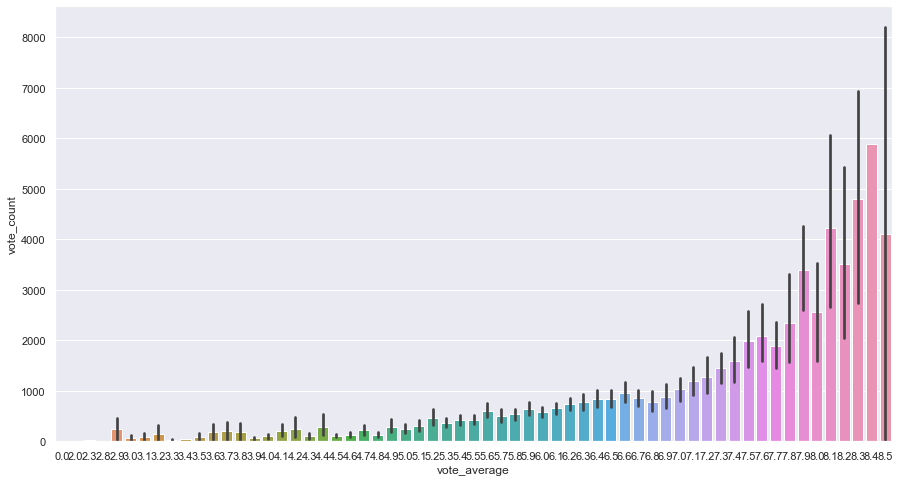

In [268]:
sns.barplot(data = movies ,x ='vote_average', y='vote_count') #Outlier makes sense for the business so we will keep them

## Vote Count Analysis

In [269]:
movies['vote_count'].describe()

count     3745.000000
mean       860.913485
std       1347.186225
min          0.000000
25%        118.000000
50%        369.000000
75%        977.000000
max      13752.000000
Name: vote_count, dtype: float64

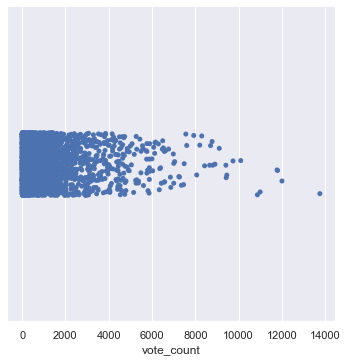

In [270]:
sns.catplot(data = movies ,x ='vote_count') #Outlier make sense for the business so we will keep them

## Genres Analysis

In [271]:
movies['genres'].value_counts()

[{"id": 18, "name": "Drama"}]                                                                                                                                                                  247
[{"id": 35, "name": "Comedy"}]                                                                                                                                                                 220
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                                                119
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                                               107
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                                                     95
                         

In [272]:
movies['genres'].unique().tolist()

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]',
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 878, "name": "Science Fiction"}]',
 '[{"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}]',
 '[{"id": 16, "name": "Animation"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 10751, "name": "Family"}]',
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}]',
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fanta

In [273]:
def clean(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return ", ".join(L)  

In [274]:
movies['genres'] = movies['genres'].apply(clean)

## Title Analysis

In [275]:
movies['title'].value_counts()

Batman                     2
The Host                   2
Jeff, Who Lives at Home    1
Blood Diamond              1
Alien³                     1
                          ..
The Muppets                1
Scary Movie 2              1
Home Fries                 1
UHF                        1
Pineapple Express          1
Name: title, Length: 3743, dtype: int64

In [276]:
movies['title'].tolist()

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

### Changing production companies and countries from dict to str

In [277]:
movies['production_companies'] = movies['production_companies'].apply(clean) 

In [278]:
movies['production_countries'] = movies['production_countries'].apply(clean)

In [279]:
movies.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, Science Fiction",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


## Production Companies

In [280]:
movies['production_companies'].value_counts()

                                                                                                                                                                       83
Paramount Pictures                                                                                                                                                     51
Universal Pictures                                                                                                                                                     40
Columbia Pictures                                                                                                                                                      34
New Line Cinema                                                                                                                                                        30
                                                                                                                                                      

In [281]:
movies['production_companies'].unique().tolist()

['Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment',
 'Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions',
 'Columbia Pictures, Danjaq, B24',
 'Legendary Pictures, Warner Bros., DC Entertainment, Syncopy',
 'Walt Disney Pictures',
 'Columbia Pictures, Laura Ziskin Productions, Marvel Enterprises',
 'Walt Disney Pictures, Walt Disney Animation Studios',
 'Marvel Studios, Prime Focus, Revolution Sun Studios',
 'Warner Bros., Heyday Films',
 'DC Comics, Atlas Entertainment, Warner Bros., DC Entertainment, Cruel & Unusual Films, RatPac-Dune Entertainment',
 'DC Comics, Legendary Pictures, Warner Bros., Bad Hat Harry Productions',
 'Eon Productions',
 'Walt Disney Pictures, Jerry Bruckheimer Films, Infinitum Nihil, Silver Bullet Productions (II), Blind Wink Productions, Classic Media',
 'Legendary Pictures, Warner Bros., DC Entertainment, Syncopy, Cruel and Unusual Films',
 'Walt Disney, Walden Media, Stillkin

## Production Countries

In [282]:
movies['production_countries'].value_counts()

United States of America                     2434
United Kingdom, United States of America      157
Germany, United States of America             108
United Kingdom                                 83
Canada, United States of America               78
                                             ... 
United States of America, Romania               1
Canada, Germany                                 1
Germany, United States of America, France       1
Iran                                            1
Austria, France, Germany, Italy                 1
Name: production_countries, Length: 384, dtype: int64

In [283]:
movies['production_companies'].unique().tolist()

['Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment',
 'Walt Disney Pictures, Jerry Bruckheimer Films, Second Mate Productions',
 'Columbia Pictures, Danjaq, B24',
 'Legendary Pictures, Warner Bros., DC Entertainment, Syncopy',
 'Walt Disney Pictures',
 'Columbia Pictures, Laura Ziskin Productions, Marvel Enterprises',
 'Walt Disney Pictures, Walt Disney Animation Studios',
 'Marvel Studios, Prime Focus, Revolution Sun Studios',
 'Warner Bros., Heyday Films',
 'DC Comics, Atlas Entertainment, Warner Bros., DC Entertainment, Cruel & Unusual Films, RatPac-Dune Entertainment',
 'DC Comics, Legendary Pictures, Warner Bros., Bad Hat Harry Productions',
 'Eon Productions',
 'Walt Disney Pictures, Jerry Bruckheimer Films, Infinitum Nihil, Silver Bullet Productions (II), Blind Wink Productions, Classic Media',
 'Legendary Pictures, Warner Bros., DC Entertainment, Syncopy, Cruel and Unusual Films',
 'Walt Disney, Walden Media, Stillkin

## Status Analysis

In [284]:
movies['status'].value_counts()

Released           3742
Post Production       2
Rumored               1
Name: status, dtype: int64

In [285]:
movies[movies['status']=='Rumored']

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
4508,56000,Documentary,70875,"[{""id"": 1729, ""name"": ""migration""}, {""id"": 190...",en,The Harvest (La Cosecha),The story of the children who work 12-14 hour ...,0.010909,,,2011-07-29,0,80.0,[],Rumored,The Harvest (La Cosecha),0.0,0


In [286]:
movies.drop(4508,axis = 0 , inplace =True)

In [287]:
movies.reset_index(inplace =True , drop = True)

## Merge both dataframes

In [288]:
movies = movies.merge(credits)

In [289]:
movies.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"Adventure, Fantasy, Action",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"Action, Adventure, Crime",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Cast Analysis

In [290]:
def clean3(obj):
    L = []
    count = 0
    for i in ast.literal_eval(obj):
        if count < 3:
            L.append(i['name'])
        count +=1 
    return ", ".join(L)  

In [291]:
movies['cast'] = movies['cast'].apply(clean3) 

In [292]:
movies.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"Adventure, Fantasy, Action",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"Action, Adventure, Crime",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


## Crew Analysis

In [293]:
def get_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return "".join(L)  

In [294]:
movies['crew'] = movies['crew'].apply(get_director) 

In [295]:
movies.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,19995,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron
1,300000000,"Adventure, Fantasy, Action",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,285,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski
2,245000000,"Action, Adventure, Crime",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,206647,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes


## Drop unneeded columns

In [296]:
movies.drop('movie_id', axis=1, inplace=True)

In [297]:
movies.drop('keywords', axis=1, inplace=True)
movies.drop('spoken_languages', axis=1, inplace=True)

In [298]:
movies.drop('original_title', axis=1, inplace=True)
movies.drop('overview', axis=1, inplace=True)

In [299]:
movies.head()

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron
1,300000000,"Adventure, Fantasy, Action",285,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski
2,245000000,"Action, Adventure, Crime",206647,en,107.376788,"Columbia Pictures, Danjaq, B24","United Kingdom, United States of America",2015-10-26,880674609,148.0,Released,Spectre,6.3,4466,"Daniel Craig, Christoph Waltz, Léa Seydoux",Sam Mendes
3,250000000,"Action, Crime, Drama, Thriller",49026,en,112.312950,"Legendary Pictures, Warner Bros., DC Entertain...",United States of America,2012-07-16,1084939099,165.0,Released,The Dark Knight Rises,7.6,9106,"Christian Bale, Michael Caine, Gary Oldman",Christopher Nolan
4,260000000,"Action, Adventure, Science Fiction",49529,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132.0,Released,John Carter,6.1,2124,"Taylor Kitsch, Lynn Collins, Samantha Morton",Andrew Stanton


In [300]:
movies.duplicated().sum()

0

# Feature Engineering

#### Format Data

In [301]:
movies['release_date'] = pd.to_datetime(movies['release_date'], format = '%Y-%m-%d') 

In [302]:
movies.info() #release_date dtype has been updated

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3748 entries, 0 to 3747
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3748 non-null   int64         
 1   genres                3748 non-null   object        
 2   id                    3748 non-null   int64         
 3   original_language     3748 non-null   object        
 4   popularity            3748 non-null   float64       
 5   production_companies  3748 non-null   object        
 6   production_countries  3748 non-null   object        
 7   release_date          3748 non-null   datetime64[ns]
 8   revenue               3748 non-null   int64         
 9   runtime               3748 non-null   float64       
 10  status                3748 non-null   object        
 11  title                 3748 non-null   object        
 12  vote_average          3748 non-null   float64       
 13  vote_count        

In [303]:
movies.isnull().sum() #DOUBLE CHECKING NULL VALUES

budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [304]:
movies.duplicated().sum()

0

#### Create Year Column

In [305]:
from datetime import datetime

In [306]:
movies['year'] = movies['release_date'].dt.year

In [307]:
movies['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
3743    2007
3744    1997
3745    2004
3746    1992
3747    2011
Name: year, Length: 3748, dtype: int64

In [308]:
movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,2009
1,300000000,"Adventure, Fantasy, Action",285,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,2007


### Create Profit Column

In [309]:
movies['profit'] = movies['revenue'] - movies['budget']

In [310]:
movies.head(2)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,2009,2550965087
1,300000000,"Adventure, Fantasy, Action",285,en,139.082615,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2007-05-19,961000000,169.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,"Johnny Depp, Orlando Bloom, Keira Knightley",Gore Verbinski,2007,661000000


## َQuestions

#### Which movies have the highest and lowest profit?

In [311]:
movies[movies['profit'] == movies['profit'].max()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
0,237000000,"Action, Adventure, Fantasy, Science Fiction",19995,en,150.437577,"Ingenious Film Partners, Twentieth Century Fox...","United States of America, United Kingdom",2009-12-10,2787965087,162.0,Released,Avatar,7.2,11800,"Sam Worthington, Zoe Saldana, Sigourney Weaver",James Cameron,2009,2550965087


In [312]:
movies[movies['profit'] == movies['profit'].min()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
13,255000000,"Action, Adventure, Western",57201,en,49.046956,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2013-07-03,89289910,149.0,Released,The Lone Ranger,5.9,2311,"Johnny Depp, Armie Hammer, William Fichtner",Gore Verbinski,2013,-165710090


#### Which movies have the highest and lowest rating?

In [322]:
movies[movies['vote_average'] == movies['vote_average'].max()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
1782,25000000,"Drama, Crime",278,en,136.747729,Castle Rock Entertainment,United States of America,1994-09-23,28341469,142.0,Released,The Shawshank Redemption,8.5,8205,"Tim Robbins, Morgan Freeman, Bob Gunton",Frank Darabont,1994,3341469
2659,10500000,"Drama, Comedy",88641,en,0.037073,Nelson Entertainment,United States of America,1994-09-02,123509,99.0,Released,There Goes My Baby,8.5,2,"Dermot Mulroney, Ricky Schroder, Kelli Williams",Floyd Mutrux,1994,-10376491


In [323]:
movies[movies['vote_average'] == movies['vote_average'].min()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
3276,3500000,Documentary,370662,en,1.618138,Representational Pictures,United States of America,2015-09-04,0,100.0,Released,Time to Choose,0.0,0,"Oscar Isaac, Jane Goodall, Jerry Brown",Charles Ferguson,2015,-3500000
3404,2100000,"Drama, Crime",364083,en,0.039007,Industrial House Films,United States of America,2015-10-16,3330,126.0,Released,Mi America,0.0,0,"Robert Fontaine, Michael Brainard, Grant Boyd",Robert Fontaine,2015,-2096670
3535,1200000,Comedy,49951,en,0.047781,,,2007-03-01,0,85.0,Released,Certifiably Jonathan,0.0,0,"Jonathan Winters, Robin Williams, Sarah Silverman",James David Pasternak,2007,-1200000
3624,700000,Drama,302579,en,0.578798,Red-horse Native,United States of America,1999-10-08,10508,107.0,Released,Naturally Native,0.0,0,"Valerie Red-Horse, Yvonne Russo, Irene Bedard",Valerie Red-Horse,1999,-689492
3653,500,"Crime, Drama",119657,en,0.080105,,Dominican Republic,2012-03-01,0,101.0,Released,El Rey de Najayo,0.0,0,"Manny Pérez, Luz Garcia, Sergio Carlo",Fernando Baez Mella,2012,-500
3682,300000,"Romance, Comedy, Drama",324352,en,0.006323,Illumination Pictures,United States of America,2010-05-20,0,98.0,Released,Anderson's Cross,0.0,0,"Joanna Cassidy, Joyce Guy, Bill Moseley",Jerome Elston Scott,2010,-300000
3687,300000,"Drama, Action, Crime",378237,en,0.018087,Daniel Columbie Films & Productions,United States of America,2014-12-01,0,90.0,Released,Amidst the Devil's Wings,0.0,0,,,2014,-300000


#### Which movies have the highest and lowest budget?

In [316]:
movies[movies['budget'] == movies['budget'].max()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
17,380000000,"Adventure, Action, Fantasy",1865,en,135.413856,"Walt Disney Pictures, Jerry Bruckheimer Films,...",United States of America,2011-05-14,1045713802,136.0,Released,Pirates of the Caribbean: On Stranger Tides,6.4,4948,"Johnny Depp, Penélope Cruz, Ian McShane",Rob Marshall,2011,665713802


In [317]:
movies[movies['budget'] == movies['budget'].min()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
2632,11,"Drama, Action",28932,en,3.375208,"United Artists, chateau productions",United States of America,1978-04-26,11,145.0,Released,F.I.S.T.,6.4,29,"Sylvester Stallone, Rod Steiger, Peter Boyle",Norman Jewison,1978,0


#### Which movies have the Longest And Shortest Runtime?

In [318]:
movies[movies['runtime'] == movies['runtime'].max()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
2199,18000000,"Crime, Drama, Thriller, History",43434,en,1.138383,"Egoli Tossell Film AG, Canal+, Arte France, Fi...","France, Germany",2010-05-19,871279,338.0,Released,Carlos,6.7,50,"Edgar Ramírez, Alexander Scheer, Fadi Abi Samra",Olivier Assayas,2010,-17128721


In [319]:
movies[movies['runtime'] == movies['runtime'].min()]

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,cast,crew,year,profit
3125,5000000,Documentary,78394,en,4.498368,"N3D Land Productions, Mantello Brothers Produc...","France, United Kingdom",2010-05-14,4074023,41.0,Released,Sea Rex 3D: Journey to a Prehistoric World,5.9,11,"Guillaume Denaiffe, Norbert Ferrer, Chloe Holl...",Ronan Chapalain,2010,-925977


#### How many movies have a rating higher than 6?

In [321]:
movies[movies['vote_average'] > 6 ].shape[0]

2267

#### Which year has the most releases?

In [329]:
movies['year'].value_counts()

2011    193
2010    185
2009    184
2013    184
2006    181
       ... 
1958      1
1950      1
1936      1
1934      1
1925      1
Name: year, Length: 88, dtype: int64

####  Top 10 Profits

In [341]:
movies['profit'].value_counts()

-10000000    29
-1000000     21
-20000000    19
-5000000     18
-7000000     16
             ..
-4965111      1
 52298489     1
-11416317     1
 55000000     1
-4280549      1
Name: profit, Length: 3319, dtype: int64

In [352]:
top_10_profits = movies['profit'].nlargest(n=10)

In [353]:
top_10_profits_df = movies[movies['profit'].isin(top_10_profits)]

<AxesSubplot:xlabel='count', ylabel='profit'>

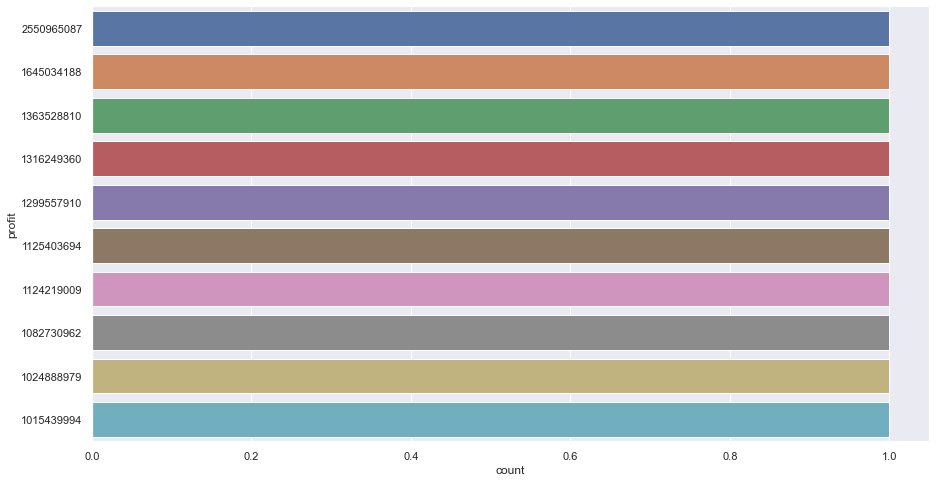

In [359]:
sns.countplot(data = top_10_profits_df , y ='profit',order=top_10_profits)

#### Most Frequent Actors

In [370]:
movies['cast'].value_counts().head()

                                                      6
William Shatner, Leonard Nimoy, DeForest Kelley       6
Daniel Radcliffe, Rupert Grint, Emma Watson           6
Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth    4
David Arquette, Neve Campbell, Courteney Cox          4
Name: cast, dtype: int64

#### Most Frequent Director

In [380]:
movies['crew'].value_counts().head()

Steven Spielberg    27
Clint Eastwood      19
Martin Scorsese     17
Ridley Scott        16
Woody Allen         16
Name: crew, dtype: int64

#### Most Frequent Production Countries

In [383]:
movies['production_countries'].value_counts().head()

United States of America                    2436
United Kingdom, United States of America     158
Germany, United States of America            108
United Kingdom                                83
Canada, United States of America              78
Name: production_countries, dtype: int64